In [184]:
org_path = "Singapore_port.csv"
path = '/Users/aurora/Desktop/中远海科合作项目/论文解读/stage 2/DeepAnT/data/updated_rawdata/Processed_Singapore_Data.csv'
smooth_path = '/Users/aurora/Desktop/中远海科合作项目/论文解读/stage 2/DeepAnT/data/smoothed_data/smoothed_Singapore_data.csv'


### manipulate data
后面要考虑一下dwt的影响

In [185]:
import pandas as pd

In [186]:
# drop the rows in 2020
# sort the summary_time column
LAdata = pd.read_csv(org_path)
LAdata['summary_time'] = pd.to_datetime(LAdata['summary_time'], errors='coerce')
LAdata = LAdata[LAdata['summary_time'].dt.year != 2020]
LAdata = LAdata.sort_values(by='summary_time').reset_index(drop=True)
LAdata.head()


,Unnamed: 0,port_code,summary_time,year_month_day_hour,year_month_day,year_month,year,vessel_type,vessel_sub_type,vessel_sub2_type,...,berth_duration,stay_duration,ref_key,remark,average_berth_num,average_moor_num,average_stay_num,average_berth_dwt,average_moor_dwt,average_stay_dwt
0,75786,SGSGP,2021-01-01 00:00:00+00:00,2021-01-01-08,2021-01-01,2021-01,2021,20000,20500,20506.0,...,28.95,28.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75902,SGSGP,2021-01-01 00:00:00+00:00,2021-01-01-08,2021-01-01,2021-01,2021,30000,30100,30106.0,...,8.05,156.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75901,SGSGP,2021-01-01 00:00:00+00:00,2021-01-01-08,2021-01-01,2021-01,2021,30000,30600,30604.0,...,122.19,151.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75871,SGSGP,2021-01-01 00:00:00+00:00,2021-01-01-08,2021-01-01,2021-01,2021,20000,20500,20508.0,...,12.55,15.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75870,SGSGP,2021-01-01 00:00:00+00:00,2021-01-01-08,2021-01-01,2021-01,2021,30000,30600,30603.0,...,37.30,55.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
LAdata.columns

Index(['Unnamed: 0', 'port_code', 'summary_time', 'year_month_day_hour',
       'year_month_day', 'year_month', 'year', 'vessel_type',
       'vessel_sub_type', 'vessel_sub2_type', 'moor_num', 'berth_num',
       'moor_dwt', 'berth_dwt', 'average_moor_duration',
       'average_berth_duration', 'average_stay_duration', 'update_time',
       'stay_num', 'stay_dwt', 'moor_duration', 'berth_duration',
       'stay_duration', 'ref_key', 'remark', 'average_berth_num',
       'average_moor_num', 'average_stay_num', 'average_berth_dwt',
       'average_moor_dwt', 'average_stay_dwt'],
      dtype='object')

In [188]:
LAdata = LAdata.drop(['Unnamed: 0', 'port_code', 'year_month_day_hour', 'year', 'year_month', 'year_month_day', 'ref_key', 'remark'], axis=1, errors='ignore')
LAdata.head()


,summary_time,vessel_type,vessel_sub_type,vessel_sub2_type,moor_num,berth_num,moor_dwt,berth_dwt,average_moor_duration,average_berth_duration,...,stay_dwt,moor_duration,berth_duration,stay_duration,average_berth_num,average_moor_num,average_stay_num,average_berth_dwt,average_moor_dwt,average_stay_dwt
0,2021-01-01 00:00:00+00:00,20000,20500,20506.0,0,4,0,623956,0.00,28.69,...,623956,NaN,28.95,28.95,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01 00:00:00+00:00,30000,30100,30106.0,8,2,2470736,641610,34.26,65.03,...,3112346,192.79,8.05,156.30,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-01 00:00:00+00:00,30000,30600,30604.0,10,2,1090318,211142,15.39,29.61,...,1301460,157.04,122.19,151.23,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-01 00:00:00+00:00,20000,20500,20508.0,2,8,399488,1625678,4.17,29.90,...,2025166,24.95,12.55,15.03,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-01 00:00:00+00:00,30000,30600,30603.0,0,2,0,149390,6.23,46.06,...,149390,NaN,37.30,55.99,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
drop_index = LAdata[LAdata['stay_num']==0].index
raw_data = LAdata.drop(drop_index)


In [190]:
raw_data['total_moor_duration'] = raw_data['moor_duration'] * raw_data['moor_num']
raw_data['total_berth_duration'] = raw_data['berth_duration'] * raw_data['berth_num']
raw_data['total_stay_duration'] = raw_data['stay_duration'] * raw_data['stay_num']
raw_data.head()

,summary_time,vessel_type,vessel_sub_type,vessel_sub2_type,moor_num,berth_num,moor_dwt,berth_dwt,average_moor_duration,average_berth_duration,...,stay_duration,average_berth_num,average_moor_num,average_stay_num,average_berth_dwt,average_moor_dwt,average_stay_dwt,total_moor_duration,total_berth_duration,total_stay_duration
0,2021-01-01 00:00:00+00:00,20000,20500,20506.0,0,4,0,623956,0.00,28.69,...,28.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.80,115.80
1,2021-01-01 00:00:00+00:00,30000,30100,30106.0,8,2,2470736,641610,34.26,65.03,...,156.30,NaN,NaN,NaN,NaN,NaN,NaN,1542.32,16.10,1563.00
2,2021-01-01 00:00:00+00:00,30000,30600,30604.0,10,2,1090318,211142,15.39,29.61,...,151.23,NaN,NaN,NaN,NaN,NaN,NaN,1570.40,244.38,1814.76
3,2021-01-01 00:00:00+00:00,20000,20500,20508.0,2,8,399488,1625678,4.17,29.90,...,15.03,NaN,NaN,NaN,NaN,NaN,NaN,49.90,100.40,150.30
4,2021-01-01 00:00:00+00:00,30000,30600,30603.0,0,2,0,149390,6.23,46.06,...,55.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.60,111.98


In [191]:
def fill_total_berth_duration(row):
    if pd.isna(row['total_berth_duration']) and row['total_stay_duration'] == row['total_moor_duration']:
        return 0  
    else:
        return row['total_berth_duration']
    
raw_data['total_berth_duration'] = raw_data.apply(fill_total_berth_duration, axis=1)


In [192]:
raw_data.isnull().sum()

summary_time                   0
vessel_type                    0
vessel_sub_type                0
vessel_sub2_type           63436
moor_num                       0
berth_num                      0
moor_dwt                       0
berth_dwt                      0
average_moor_duration      29661
average_berth_duration     37058
average_stay_duration      37058
update_time                    0
stay_num                       0
stay_dwt                       0
moor_duration              57739
berth_duration             52552
stay_duration                  0
average_berth_num         179899
average_moor_num          177967
average_stay_num          179899
average_berth_dwt         179899
average_moor_dwt          177967
average_stay_dwt          179899
total_moor_duration        57739
total_berth_duration           0
total_stay_duration            0
dtype: int64

In [193]:
# 如果 moor_num==0,让 total_moor_duration = 0
def fill_total_moor_duration(row):
    if pd.isna(row['total_moor_duration']) and row['moor_num'] == 0:
        return 0  
    else:
        return row['total_moor_duration']  # 保持原来的值

# 使用 apply 方法更新 total_berth_duration 列
raw_data['total_moor_duration'] = raw_data.apply(fill_total_moor_duration, axis=1)

In [194]:
raw_data.isnull().sum()

summary_time                   0
vessel_type                    0
vessel_sub_type                0
vessel_sub2_type           63436
moor_num                       0
berth_num                      0
moor_dwt                       0
berth_dwt                      0
average_moor_duration      29661
average_berth_duration     37058
average_stay_duration      37058
update_time                    0
stay_num                       0
stay_dwt                       0
moor_duration              57739
berth_duration             52552
stay_duration                  0
average_berth_num         179899
average_moor_num          177967
average_stay_num          179899
average_berth_dwt         179899
average_moor_dwt          177967
average_stay_dwt          179899
total_moor_duration            0
total_berth_duration           0
total_stay_duration            0
dtype: int64

In [195]:
# create a new dataframe
data = pd.DataFrame()

# 顺序从2020->2024
data['summary_time'] = sorted(raw_data['summary_time'].unique())
data['moor_num'] = raw_data.groupby('summary_time')['moor_num'].sum().values
data['berth_num'] = raw_data.groupby('summary_time')['berth_num'].sum().values
data['stay_num'] = raw_data.groupby('summary_time')['stay_num'].sum().values
data['moor_dwt'] = raw_data.groupby('summary_time')['moor_dwt'].sum().values
data['berth_dwt'] = raw_data.groupby('summary_time')['berth_dwt'].sum().values
data['stay_dwt'] = raw_data.groupby('summary_time')['stay_dwt'].sum().values

data['total_moor_duration'] = raw_data.groupby('summary_time')['total_moor_duration'].sum().values
data['total_berth_duration'] = raw_data.groupby('summary_time')['total_berth_duration'].sum().values
data['total_stay_duration'] = raw_data.groupby('summary_time')['total_stay_duration'].sum().values

data.head()

,summary_time,moor_num,berth_num,stay_num,moor_dwt,berth_dwt,stay_dwt,total_moor_duration,total_berth_duration,total_stay_duration
0,2021-01-01 00:00:00+00:00,202,138,340,9004758,8555772,17560530,26817.16,3644.88,33202.92
1,2021-01-01 04:00:00+00:00,188,144,332,7944124,10051088,17995212,26111.12,3558.36,32870.02
2,2021-01-01 08:00:00+00:00,184,142,326,8811518,9751058,18562576,25820.00,3676.92,32126.98
3,2021-01-01 12:00:00+00:00,198,136,334,8765966,9700078,18466044,24358.98,3697.58,31523.64
4,2021-01-01 16:00:00+00:00,106,75,181,4414438,5116306,9530744,12590.81,1977.09,16272.38


In [196]:
import numpy as np
data['average_moor_duration'] = np.where(
    data['moor_num'] != 0, 
    data['total_moor_duration'] / data['moor_num'], 
    0  # 当 berth_num 为 0 时，设置0
)


In [197]:
data['average_berth_duration'] = np.where(
    data['berth_num'] != 0, 
    data['total_berth_duration'] / data['berth_num'], 
    0  # 当 berth_num 为 0 时，设置0
)

In [198]:
data['average_stay_duration'] = np.where(
    data['stay_num'] != 0, 
    data['total_stay_duration'] / data['stay_num'], 
    0  # 当 stay_num 为 0 时，设置0
)


In [199]:
data.head()

,summary_time,moor_num,berth_num,stay_num,moor_dwt,berth_dwt,stay_dwt,total_moor_duration,total_berth_duration,total_stay_duration,average_moor_duration,average_berth_duration,average_stay_duration
0,2021-01-01 00:00:00+00:00,202,138,340,9004758,8555772,17560530,26817.16,3644.88,33202.92,132.758218,26.412174,97.655647
1,2021-01-01 04:00:00+00:00,188,144,332,7944124,10051088,17995212,26111.12,3558.36,32870.02,138.888936,24.710833,99.006084
2,2021-01-01 08:00:00+00:00,184,142,326,8811518,9751058,18562576,25820.00,3676.92,32126.98,140.326087,25.893803,98.549018
3,2021-01-01 12:00:00+00:00,198,136,334,8765966,9700078,18466044,24358.98,3697.58,31523.64,123.025152,27.188088,94.382156
4,2021-01-01 16:00:00+00:00,106,75,181,4414438,5116306,9530744,12590.81,1977.09,16272.38,118.781226,26.361200,89.902652


In [200]:
# path = '/Users/aurora/Desktop/中远海科合作项目/论文解读/stage 2/DeepAnT/data/updated_rawdata/Processed_Shanghai_Data.csv'
data.to_csv(path, index=False)


### smooth the data (by Gaussian)

In [208]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(size, sigma=2):
    x = np.linspace(-(size // 2), size // 2, size)
    g = np.exp(-0.5 * (x / sigma) ** 2)
    return g / g.sum()

def apply_gaussian_smoothing(data_column, kernel_size=5, sigma=2):
    kernel = gaussian_kernel(kernel_size, sigma)
    smoothed_data = np.convolve(data_column, kernel, mode='same')
    return smoothed_data

def choose_parameters(data_length):
    # kernel_size = max(5, int(data_length * 0.03))
    kernel_size = 10
    sigma = kernel_size / 6
    return kernel_size, sigma

smoothed_data = data.copy()
data_length = len(data)
kernel_size, sigma = choose_parameters(data_length)

for col in data.columns:
    if col != 'summary_time':
        smoothed_data[col] = apply_gaussian_smoothing(data[col], kernel_size, sigma)




In [202]:
data.head()

,summary_time,moor_num,berth_num,stay_num,moor_dwt,berth_dwt,stay_dwt,total_moor_duration,total_berth_duration,total_stay_duration,average_moor_duration,average_berth_duration,average_stay_duration
0,2021-01-01 00:00:00+00:00,202,138,340,9004758,8555772,17560530,26817.16,3644.88,33202.92,132.758218,26.412174,97.655647
1,2021-01-01 04:00:00+00:00,188,144,332,7944124,10051088,17995212,26111.12,3558.36,32870.02,138.888936,24.710833,99.006084
2,2021-01-01 08:00:00+00:00,184,142,326,8811518,9751058,18562576,25820.00,3676.92,32126.98,140.326087,25.893803,98.549018
3,2021-01-01 12:00:00+00:00,198,136,334,8765966,9700078,18466044,24358.98,3697.58,31523.64,123.025152,27.188088,94.382156
4,2021-01-01 16:00:00+00:00,106,75,181,4414438,5116306,9530744,12590.81,1977.09,16272.38,118.781226,26.361200,89.902652


In [203]:
smoothed_data.head()

,summary_time,moor_num,berth_num,stay_num,moor_dwt,berth_dwt,stay_dwt,total_moor_duration,total_berth_duration,total_stay_duration,average_moor_duration,average_berth_duration,average_stay_duration
0,2021-01-01 00:00:00+00:00,105.540192,76.249396,181.789588,4.670150e+06,5.138054e+06,9.808204e+06,14044.873747,1981.543240,17644.192878,76.700210,15.124417,56.022781
1,2021-01-01 04:00:00+00:00,127.523117,91.791620,219.314736,5.623351e+06,6.230132e+06,1.185348e+07,16787.575900,2395.758184,21152.850311,94.844562,19.085633,69.678713
2,2021-01-01 08:00:00+00:00,140.601095,100.352006,240.953102,6.158629e+06,6.853710e+06,1.301234e+07,18214.076275,2634.956691,23030.201525,107.794558,22.297687,79.861811
3,2021-01-01 12:00:00+00:00,144.215316,101.491188,245.706503,6.250106e+06,6.963579e+06,1.321368e+07,18274.897390,2685.327369,23197.561394,114.801214,24.564788,85.983741
4,2021-01-01 16:00:00+00:00,140.889295,97.283044,238.172339,6.021610e+06,6.691110e+06,1.271272e+07,17371.530853,2595.332469,22143.886268,116.995948,25.957105,88.713587


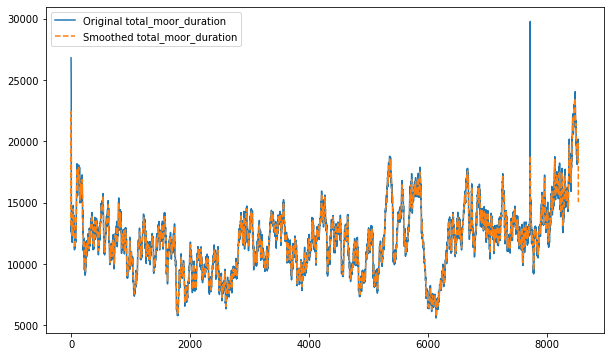

In [209]:
plt.figure(figsize=(10, 6))
plt.plot(data['total_moor_duration'], label='Original total_moor_duration')
plt.plot(smoothed_data['total_moor_duration'], label='Smoothed total_moor_duration', linestyle='--')
plt.legend()
plt.show()


In [210]:
# smooth_path = '/Users/aurora/Desktop/中远海科合作项目/论文解读/stage 2/DeepAnT/data/smoothed_data/smoothed_Shanghai_data.csv'
smoothed_data.to_csv(smooth_path, index=False)
